## "Your_off-facebook_activity" Report

### Author: Spencer Murphy

### Created: 2/25/21
### Last Updated: 3/2/21

**The Purpose of this report is to analyze how Facebook ads from non-Facebook applications target me through the collection and use of my personal data**

The question I aim to solve from this analysis is as follows: Is my Facebook account personalized for me even though I rarely ever log in? We all know by now that Facebook provides some of our data to companies as a way for those companies to display ads that are personalized to each and every user. My goal for this report is to display the companies and businesses that have requested and used my Facebook data in the past. Although I haven't used Facebook very much in the time that I've had my account, I have still been faced with a significant amount of ads.

**If someone is not an active Facebook user, then the Facebook algorithm will have a tougher time personalizing the ads that user will experience.**

In other words, since I don't use Facebook really at all anymore, there are probably lots of ads on my feed that sell products and services that I might not be interested in. In theory, if I used Facebook more, the ads I experience would be more personalized for me as the algorithm would eventually pick up on what my interests are. 




In [217]:
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
import seaborn as sns

with open(r"C:\Users\Spencer\Downloads\facebook-spencermurphy12327\ads_and_businesses\your_off-facebook_activity.json") as f:
  data = json.load(f)


data.keys()



dict_keys(['off_facebook_activity'])

In [136]:
type(data['off_facebook_activity'])

list

In [208]:
face = pd.DataFrame(data)
face


,off_facebook_activity
0,"{'name': 'The Home Depot', 'events': [{'id': 2..."
1,"{'name': 'thelogocompany.net', 'events': [{'id..."
2,"{'name': 'hootsuite.com', 'events': [{'id': 61..."
3,"{'name': 'dataquest.io', 'events': [{'id': 120..."
4,"{'name': 'vecteezy.com', 'events': [{'id': 556..."
...,...
115,"{'name': 'Think Digital', 'events': [{'id': 22..."
116,"{'name': '2K US', 'events': [{'id': 3262017682..."
117,"{'name': 'DiepTrinh', 'events': [{'id': 314878..."
118,"{'name': 'vshred.com', 'events': [{'id': 11401..."


In [209]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in data['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    search.append(len([x for x in i['events'] if x['type'] == 'SEARCH']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    ad.append(len([x for x in i['events'] if x['type'] == 'AD_REQUEST']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

In [210]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Activate App', 'Custom', 'Search', 'View Content', 'Ad Request', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Activate App'] = actapp
appbyevent['Custom'] = custom
appbyevent['Search'] = search
appbyevent['View Content'] = viewc
appbyevent['Ad Request'] = ad
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Activate App,Custom,Search,View Content,Ad Request,Page Views
0,The Home Depot,16,0,16,0,0,0,0
1,thelogocompany.net,1,0,0,0,0,0,1
2,hootsuite.com,3,0,0,0,0,0,3
3,dataquest.io,4,0,0,0,0,0,4
4,vecteezy.com,10,0,2,0,0,0,8


Here we can see that about 119 businesses have displayed ads on my Facebook feed, the first being "The Home Depot" and the last being "donordrive.com" Each ad is listed in order with a specific number or placement to go along with it. Keep this table and the apps' placements in mind as we will refer back to them looking at the below visualizations.

In [211]:
sub_apps = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] > 0]
sub_apps

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views
0,The Home Depot,16,0,16,0,0,0
1,thelogocompany.net,1,0,0,0,0,1
2,hootsuite.com,3,0,0,0,0,3
3,dataquest.io,4,0,0,0,0,4
4,vecteezy.com,10,0,2,0,0,8
...,...,...,...,...,...,...,...
115,Think Digital,1,0,1,0,0,0
116,2K US,1,0,0,0,0,0
117,DiepTrinh,1,0,0,0,0,0
118,vshred.com,1,0,0,0,1,0


**Are the ads I experience on Facebook personalized for me yet?**

It seems that Facebook does indeed know I am a student by now, as a lot of my interactions (events) stem from sites that are relative to education and schooling like the Kent, Tri-C, Quizlet websites along with the "Schools App", LinkedIn, and even "lucidchart.com." Keep in mind that I have other interests besides school like gaming and playing the guitar, and we can see that the algorithm is beginning to pick up on that with the inclusion of Rockstar Games (creators of the GTA series). Some visualizations below will further explore this.

In [212]:
sub_apps1 = appbyevent[['App', 'Event Count', 'Activate App', 'Custom', 'Ad Request', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] > 5]
sub_apps1

,App,Event Count,Activate App,Custom,Ad Request,View Content,Page Views
0,The Home Depot,16,0,16,0,0,0
4,vecteezy.com,10,0,2,0,0,8
5,adobe.com,12,0,3,0,0,9
8,Rockstar Games,7,0,0,0,0,0
15,linkedin.com,6,0,0,0,0,5
27,kent.edu,33,0,0,0,12,21
31,pcmag.com,6,0,2,0,0,4
58,tri-c.edu,337,0,0,0,39,295
68,quizlet.com,14,0,0,0,13,0
76,Schools App,27,25,2,0,0,0


Below we can see the 119 Apps/Businesses/Websites that have displayed ads on my Facebook page thus far. We can see that there seems to be an outlier, which is at about the 58th place on the graph. Looking back at the table above, we can see that Tri-C is my outlier, with about 337 events tied to it. We can also see the couple apps that I would be interested in beginning to rise above the rest. More visualizations will explore this further.

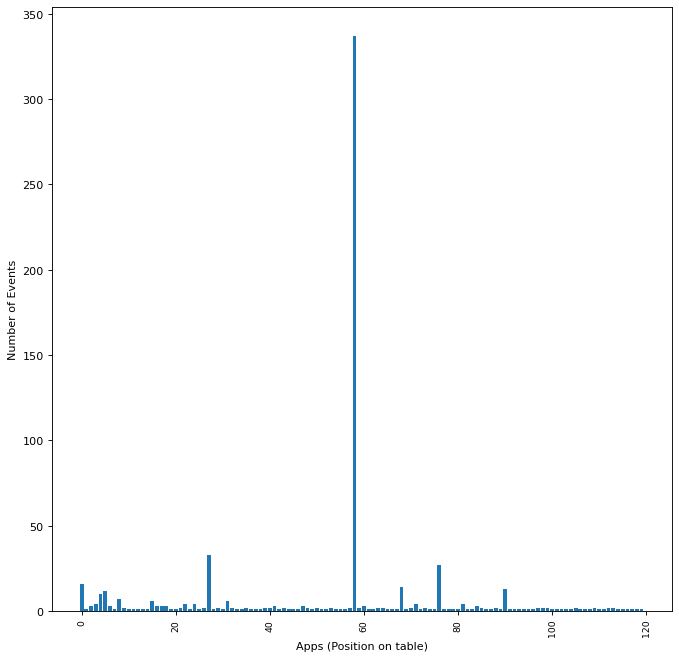

In [223]:
sortcount = sub_apps.sort_values('Event Count', ascending = False)
labels = sortcount['Event Count'].keys()
vals = sortcount['Event Count']
width = .75

fig, ax = plt.subplots(figsize = (10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels, vals)
ax.set_ylabel('Number of Events')
ax.set_xlabel('Apps (Position on table)')
plt.xticks(rotation = 90, fontsize = 'small')
plt.show()

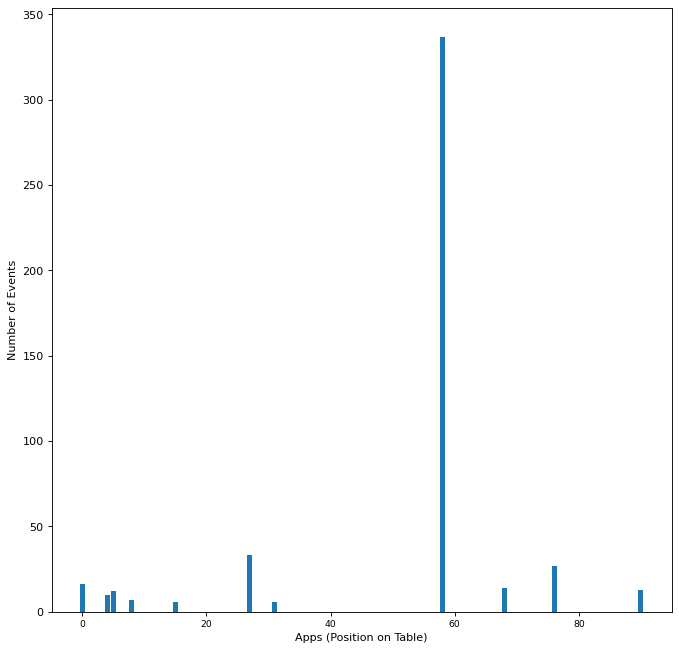

In [224]:
sortcount1 = sub_apps1.sort_values('Event Count', ascending = False)
labels = sortcount1['Event Count'].keys()
vals = sortcount1['Event Count']
width = .75

fig, ax = plt.subplots(figsize = (10,10), dpi = 80, facecolor = 'w', edgecolor = 'k')
ax.bar(labels, vals)
ax.set_ylabel('Number of Events')
ax.set_xlabel('Apps (Position on Table)')
plt.xticks(rotation = 0, fontsize = 'small')
plt.show()

The above graphic eliminates from the graph the apps that have 5 events or fewer, which was most of them. As we can see by reviewing the placement table along with this graph, it appears that even though I have never called myself an "active Facebook user", the ads I see on my account still seem to be at least semi-personalized for my interests. Or at least, the algorithm is beginning to personalize the ads that I would see on my account. Below is another visualization showcasing the apps I have interacted with most.

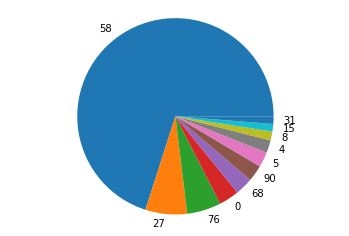

In [225]:
fig2, ax2 = plt.subplots()
ax2.pie(vals, labels = labels)
ax2.axis('equal')
plt.show()


In [229]:
stats.chisquare(sortcount['Event Count'])

Power_divergenceResult(statistic=20896.461538461528, pvalue=0.0)

### In Conclusion...

It appears to me that I have disproven my hypothesis, as even though I have spent a minimal amount of time on my Facebook account, the ads I would experience on the site are still pretty personalized to my interests. As we can see with the code just below the pie chart, our p-value regarding our chisquare test is 0, meaning that we should indeed disregard my hypothesis. Some might assume, "well of course you're going to see a more personalized experience if you spend more time on a certain site like Facebook" but nonetheless these are still some interesting results. It shows how fast sites can cater the ads you experience to your potential interests.
